# Data Analysis Project Life Cycle
- **Business Problem Understanding**
- **Data Collection**
- **Data Pre-processing**
- **Exploratory Data Analysis**
- **Reporting**

## Business Problem
**Client wants us to analyze diwali sales data in  order to understand the trend, insights, top performing products, categories, zones to that they can prepare better to improve sales.**

## Data Collection
- Client has provided historical data in csv file
- Link: https://drive.google.com/file/d/1mGY1doT8RRTgIS0eZsiexHOjUIel9pvo/view?usp=sharing

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset
data = pd.read_csv(r"C:\Users\Pracheeta\Desktop\training\Diwali Sales Data.csv", encoding = 'unicode_escape')

In [4]:
# checking the data
data.head()

,Unnamed: 0,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
0,18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
1,19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
2,20,1000113.0,Ellis,P00180642,F,26-35,19.0,1.0,Andhra Pradesh,Southern,Govt,Auto,4.0,23546.0,Married
3,21,1000416.0,Hrisheekesh,P00181842,F,26-35,46.0,1.0,Uttar Pradesh,Central,Banking,Auto,2.0,23525.0,Married
4,22,1005256.0,Grant,P00101742,F,26-35,30.0,0.0,Andhra Pradesh,Southern,IT Sector,Auto,1.0,23518.0,Unmarried


In [7]:
# creating a copy of the dataset
df = data.copy()

## Data Pre-processing
- **Data Profiling**
- **Data Cleaning**
- **Data Consistancy**
- **Data Formatting**
- **Outlier Detection & Removal**

In [8]:
df.shape

(11234, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11234 entries, 0 to 11233
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11234 non-null  int64  
 1   User_ID           11234 non-null  float64
 2   Cust_name         11234 non-null  object 
 3   Product_ID        11234 non-null  object 
 4   Gender            11234 non-null  object 
 5   Age Group         11234 non-null  object 
 6   Age               11234 non-null  float64
 7   Marital_Status    11234 non-null  float64
 8   State             11234 non-null  object 
 9   Zone              11234 non-null  object 
 10  Occupation        11234 non-null  object 
 11  Product_Category  11234 non-null  object 
 12  Orders            11234 non-null  float64
 13  Amount            11234 non-null  float64
 14  marraige_status   11234 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 1.3+ MB


In [13]:
# null values
null_values = df.isna().sum()
null_values

Unnamed: 0          0
User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
marraige_status     0
dtype: int64

In [14]:
null_values_percentage = (df.isna().sum()/(df.shape[0]))*100
null_values_percentage

Unnamed: 0          0.0
User_ID             0.0
Cust_name           0.0
Product_ID          0.0
Gender              0.0
Age Group           0.0
Age                 0.0
Marital_Status      0.0
State               0.0
Zone                0.0
Occupation          0.0
Product_Category    0.0
Orders              0.0
Amount              0.0
marraige_status     0.0
dtype: float64

In [15]:
pd.concat([null_values, null_values_percentage], axis =1)

,0,1
Unnamed: 0,0,0.0
User_ID,0,0.0
Cust_name,0,0.0
Product_ID,0,0.0
Gender,0,0.0
Age Group,0,0.0
Age,0,0.0
Marital_Status,0,0.0
State,0,0.0
Zone,0,0.0


In [16]:
# All columns
all_columns = df.columns
all_columns

Index(['Unnamed: 0', 'User_ID', 'Cust_name', 'Product_ID', 'Gender',
       'Age Group', 'Age', 'Marital_Status', 'State', 'Zone', 'Occupation',
       'Product_Category', 'Orders', 'Amount', 'marraige_status'],
      dtype='object')

In [17]:
# Numeric columns
numeric_columns = df.select_dtypes(include = np.number).columns
numeric_columns

Index(['Unnamed: 0', 'User_ID', 'Age', 'Marital_Status', 'Orders', 'Amount'], dtype='object')

In [18]:
# Non-numeric columns
non_numeric_columns = df.select_dtypes(include = object).columns
non_numeric_columns

Index(['Cust_name', 'Product_ID', 'Gender', 'Age Group', 'State', 'Zone',
       'Occupation', 'Product_Category', 'marraige_status'],
      dtype='object')

In [19]:
# Duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11229    False
11230    False
11231    False
11232    False
11233    False
Length: 11234, dtype: bool

In [20]:
# Filtering out the duplicate entries
df = df[~df.duplicated()]
df[df.duplicated()]

,Unnamed: 0,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status


In [21]:
df.columns

Index(['Unnamed: 0', 'User_ID', 'Cust_name', 'Product_ID', 'Gender',
       'Age Group', 'Age', 'Marital_Status', 'State', 'Zone', 'Occupation',
       'Product_Category', 'Orders', 'Amount', 'marraige_status'],
      dtype='object')

### Data Profiling
1. **Amount**
   - Need to change the data type from object to integer
   - The rows corresponding to null values should be dropped
   - Need to drop the rows Corresponding to values 'abcde'
   
2. **Status & unnamed1**
   - No data, should be dropped
   
3. **Orders**
   - Null values has to be dropped
   - There is outliers which can be removed
   
4. **State**
   - Andhra\xa0Pradesh & Nndhra\xa0Pradesh should be replaced with 'Andhra Pradesh'
   - Drop the rows corresponding to null values
 
5. **Zone**
   - Drop the rows corresponding to null values
   - 'Zentral' should be replaced with 'Central'
   
6. **Product_ID**
   -  Drop the rows corresponding to null values
   
7. **Marital Status**
   - Null values can be replaced with mode
   - Will create a new column where '1' can be replaced with 'Married' and '0' with unmarried
   
8. **Age**
   - 'Age' can be replaced with mode
   - Null values can be replaced with mode
   - Data type needs to be changed from object to numeric

9. **Age Group**
   - 'low-high' can be replaced with mode
   - Null values can be replaced with mode

10. **Product_Category**
    - Null values can be dropped
   
11. **Gender, Occupation**
     - Null values can be replaced with mod

**Data cleaning**

status and unnamed1

In [22]:
# Dropping Columns
df.drop(['Status' , 'unnamed1'],axis =1, inplace = True)
df.head(2)

KeyError: "['Status', 'unnamed1'] not found in axis"

Amount

In [23]:
# Changing the data type
df['Amount'] = pd.to_numeric(df['Amount'], errors = 'coerce') 
# errors = coerce will convert unsupported values into null values

In [24]:
# Dropping rows corresponding to null values in the columns : 
#['Amount', 'Orders', 'State', 'Zone', 'Product_ID', 'Product_Category']
df.dropna(subset = ['Amount', 'Orders', 'State', 'Zone', 'Product_ID', 'Product_Category'], inplace = True)

In [25]:
df.isna().sum()

Unnamed: 0          0
User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
marraige_status     0
dtype: int64

### State & Zone

In [26]:
# Replacing the type
# df['State'].unique()
df['State'] = df['State'].str.replace('Nndhra\xa0Pradesh' , 'Andhra Pradesh')
df['State'] = df['State'].str.replace('Andhra\xa0Pradesh' , 'Andhra Pradesh')
df['Zone'] = df['Zone'].str.replace('Zentral', 'Central')

In [27]:
df['Zone'].unique()

array(['Central', 'Southern', 'Western', 'Eastern', 'Northern'],
      dtype=object)

### Product_ID
Already cleaned

### Marital_Status

In [28]:
# replacing the null values with mode
marital_status_mode = df['Marital_Status'].mode()[0]
marital_status_mode

df['Marital_Status'] = df['Marital_Status'].fillna(marital_status_mode)

In [29]:
# Creating a new column with marital_status
df['marraige_status'] = df['Marital_Status'].apply(lambda x: 'Married' if(x ==1) else 'Unmarried')

In [30]:
df['Marital_Status'].unique()

array([1., 0.])

In [31]:
df.head(3)

,Unnamed: 0,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
0,18,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
1,19,1001883.0,Praneet,P00029842,M,26-35,54.0,1.0,Uttar Pradesh,Central,Hospitality,Auto,1.0,23568.0,Married
2,20,1000113.0,Ellis,P00180642,F,26-35,19.0,1.0,Andhra Pradesh,Southern,Govt,Auto,4.0,23546.0,Married


### Age

In [32]:
# Changing the data type from object to numeric
df['Age'] = pd.to_numeric(df['Age'], errors = 'coerce')


In [33]:
df['Age'].isnull().sum()

0

In [34]:
# Replace the null values with mode
age_mode = df['Age'].mode()[0]
df['Age'] = df['Age'].fillna(age_mode)

In [35]:
df['Age'].unique()

array([54., 19., 46., 30., 53., 83., 33., 40., 25., 39., 20., 32., 36.,
       35., 55., 27., 72., 16., 45., 28., 21., 38., 37., 23., 34., 49.,
       42., 24., 52., 50., 48., 31., 44., 43., 29., 26., 47., 41., 66.,
       22., 15., 51., 77., 87., 79., 71., 88., 58., 82., 62., 92., 12.,
       63., 17., 18., 13., 67., 90., 56., 75., 81., 64., 73., 84., 14.,
       76., 86., 89., 68., 61., 91., 85., 70., 80., 65., 74., 69., 78.,
       57., 60., 59.])

#### Age group

In [36]:
# Replacing null value and type with mode
age_group_mode = df['Age Group'].mode()[0]
age_group_mode
df['Age Group'] = df['Age Group'].str.replace('low-high', age_group_mode)
df['Age Group'] = df['Age Group'].fillna(age_group_mode)

#### Product_Category
Already executed

#### User_ID , Gender & Occupation

In [37]:
# Replacing null values with mode
gender_mode = df['Gender'].mode()[0]
occupation_mode = df['Occupation'].mode()[0]
df['Gender'] = df['Gender'].fillna(gender_mode)
df['Occupation'] = df['Occupation'].fillna(occupation_mode)

user_id_mode = df['User_ID'].mode()[0]
df['User_ID'] = df['User_ID'].fillna(user_id_mode)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11234 entries, 0 to 11233
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11234 non-null  int64  
 1   User_ID           11234 non-null  float64
 2   Cust_name         11234 non-null  object 
 3   Product_ID        11234 non-null  object 
 4   Gender            11234 non-null  object 
 5   Age Group         11234 non-null  object 
 6   Age               11234 non-null  float64
 7   Marital_Status    11234 non-null  float64
 8   State             11234 non-null  object 
 9   Zone              11234 non-null  object 
 10  Occupation        11234 non-null  object 
 11  Product_Category  11234 non-null  object 
 12  Orders            11234 non-null  float64
 13  Amount            11234 non-null  float64
 14  marraige_status   11234 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 1.4+ MB


In [39]:
df.isna().sum()

Unnamed: 0          0
User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
marraige_status     0
dtype: int64

Outliner Detection & Removal

In [40]:
df.describe()

,Unnamed: 0,User_ID,Age,Marital_Status,Orders,Amount
count,11234.000000,1.123400e+04,11234.000000,11234.000000,11234.000000,11234.000000
mean,5662.822503,1.007453e+06,35.433772,0.419708,2.489496,9452.764638
std,3246.094860,2.109026e+05,12.759432,0.493533,1.114845,5213.784648
min,18.000000,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,2852.250000,1.001496e+06,27.000000,0.000000,2.000000,5443.000000
50%,5661.500000,1.003064e+06,33.000000,0.000000,2.000000,8109.500000
75%,8472.750000,1.004429e+06,43.000000,1.000000,3.000000,12681.500000
max,11333.000000,1.100173e+07,92.000000,1.000000,4.000000,23568.000000


Text(0.5, 1.0, "Box plot for 'Amount'")

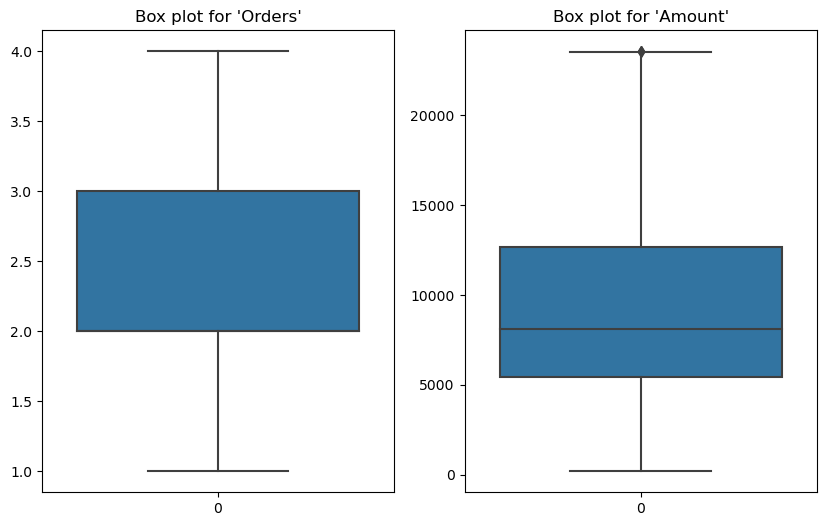

In [41]:
# Visualization of outliers
fig,ax = plt.subplots(1,2, figsize = (10,6))
sns.boxplot(data = df['Orders'], ax = ax[0])
ax[0].set_title("Box plot for 'Orders'")

sns.boxplot(data = df['Amount'], ax = ax[1])
ax[1].set_title("Box plot for 'Amount'")


Order


In [42]:
# Quartile
Q1_order = np.quantile(df['Orders'], 0.25)
Q3_order = np.quantile(df['Orders'], 0.75)
IQR_order = Q3_order - Q1_order
# IQR_order
lower_limit_order = Q1_order - 1.5*IQR_order
upper_limit_order = Q3_order + 1.5*IQR_order

In [43]:
# Removing the outliers
df = df[(df['Orders'] > lower_limit_order) & (df['Orders'] < upper_limit_order)]

Amount

In [44]:
# Quartile
Q1_amount = np.quantile(df['Amount'], 0.25)
Q3_amount = np.quantile(df['Amount'], 0.75)
IQR_amount = Q3_amount - Q1_amount
#IQR_order
lower_limit_amount = Q1_amount - 1.5*IQR_amount
upper_limit_amount = Q3_amount + 1.5*IQR_amount

print(lower_limit_amount)
print(upper_limit_amount)

-5414.75
23539.25


In [45]:
# Removing the outliers
df = df[(df['Amount'] > lower_limit_amount) & (df['Amount'] < upper_limit_amount)]

In [46]:
df.describe()

,Unnamed: 0,User_ID,Age,Marital_Status,Orders,Amount
count,11231.000000,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,5664.330069,1.007455e+06,35.431929,0.419553,2.489627,9448.996166
std,3245.217294,2.109308e+05,12.757788,0.493508,1.114725,5209.378851
min,21.000000,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,2854.500000,1.001496e+06,27.000000,0.000000,2.000000,5443.000000
50%,5663.000000,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,8473.500000,1.004430e+06,43.000000,1.000000,3.000000,12677.500000
max,11333.000000,1.100173e+07,92.000000,1.000000,4.000000,23525.000000


In [47]:
# Saving the cleaned data
df.to_csv(r"C:\Users\Pracheeta\Desktop\training\Diwali_sale_cleaned.csv")

### Exploring data analysis

Statistical Analysis

In [48]:
df.head(2)

,Unnamed: 0,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
3,21,1000416.0,Hrisheekesh,P00181842,F,26-35,46.0,1.0,Uttar Pradesh,Central,Banking,Auto,2.0,23525.0,Married
4,22,1005256.0,Grant,P00101742,F,26-35,30.0,0.0,Andhra Pradesh,Southern,IT Sector,Auto,1.0,23518.0,Unmarried


In [49]:
df.describe()

,Unnamed: 0,User_ID,Age,Marital_Status,Orders,Amount
count,11231.000000,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,5664.330069,1.007455e+06,35.431929,0.419553,2.489627,9448.996166
std,3245.217294,2.109308e+05,12.757788,0.493508,1.114725,5209.378851
min,21.000000,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,2854.500000,1.001496e+06,27.000000,0.000000,2.000000,5443.000000
50%,5663.000000,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,8473.500000,1.004430e+06,43.000000,1.000000,3.000000,12677.500000
max,11333.000000,1.100173e+07,92.000000,1.000000,4.000000,23525.000000


### Data visualization

Gender Wise Analysis

In [50]:
#Plot data
data_gender_count = df.groupby(['Gender'], as_index = False)['Orders'].count()
print("Gender wise order count \n", data_gender_count)

data_gender_amount = df.groupby(['Gender'], as_index = False)['Amount'].sum()
print("Gender wise Purchase Power \n", data_gender_amount)

Gender wise order count 
   Gender  Orders
0      F    7834
1      M    3397
Gender wise Purchase Power 
   Gender       Amount
0      F  74399443.94
1      M  31722232.00


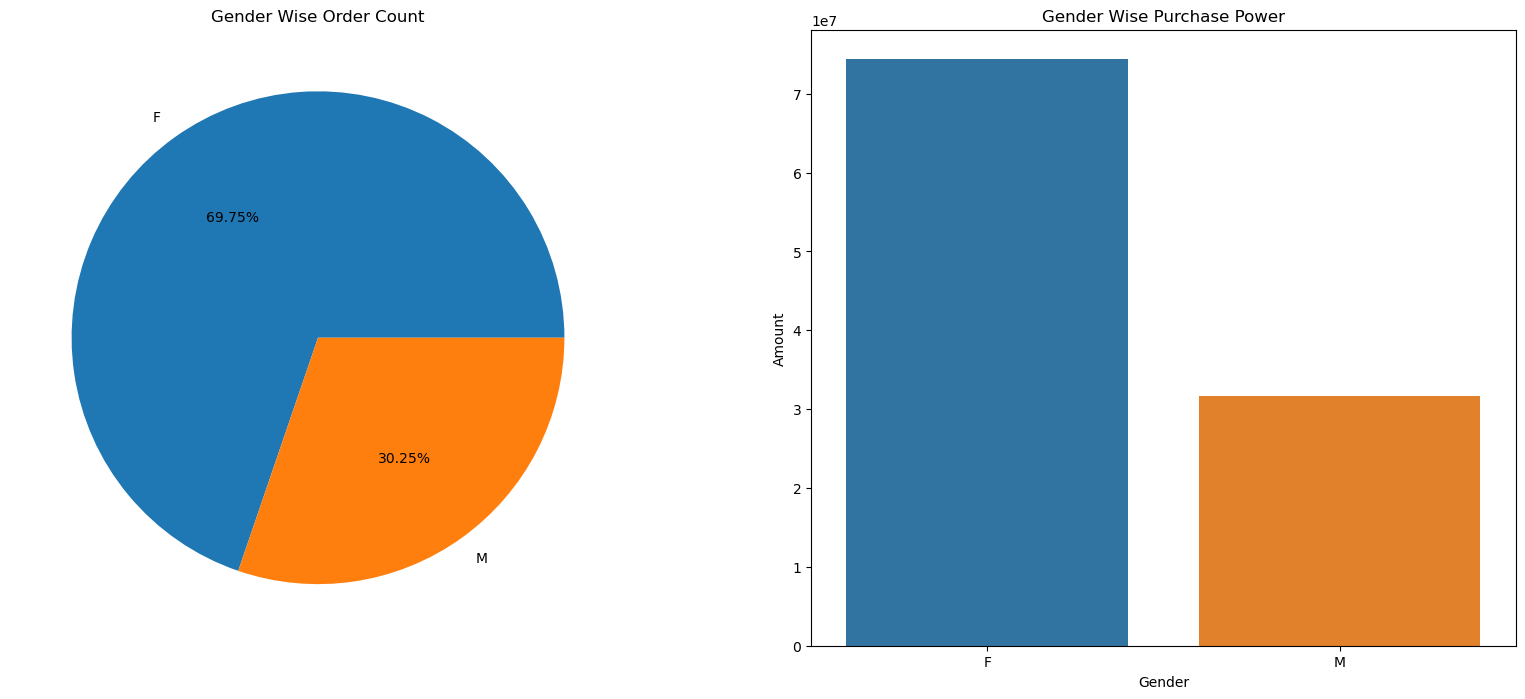

In [51]:
# Plotting
fig,ax = plt.subplots(1,2, figsize = (20,8))

# Pie Chart
ax[0].pie(x = data_gender_count['Orders'], 
           labels = data_gender_count['Gender'], autopct = "%1.2f%%")
ax[0].set_title("Gender Wise Order Count")

# Bar Chart
sns.barplot(x = 'Gender', y = 'Amount', data = data_gender_amount, ax = ax[1])
ax[1].set_title("Gender Wise Purchase Power")
plt.show()

##### Conclusion:
Females generally places more order and their purchase power is also higher

Marital Status wise Analysis

In [52]:
# Plot data
data_marraige_status_amount = df.groupby(['marraige_status'], as_index = False)['Amount'].sum()
data_marraige_status_amount

,marraige_status,Amount
0,Married,43933256.00
1,Unmarried,62188419.94


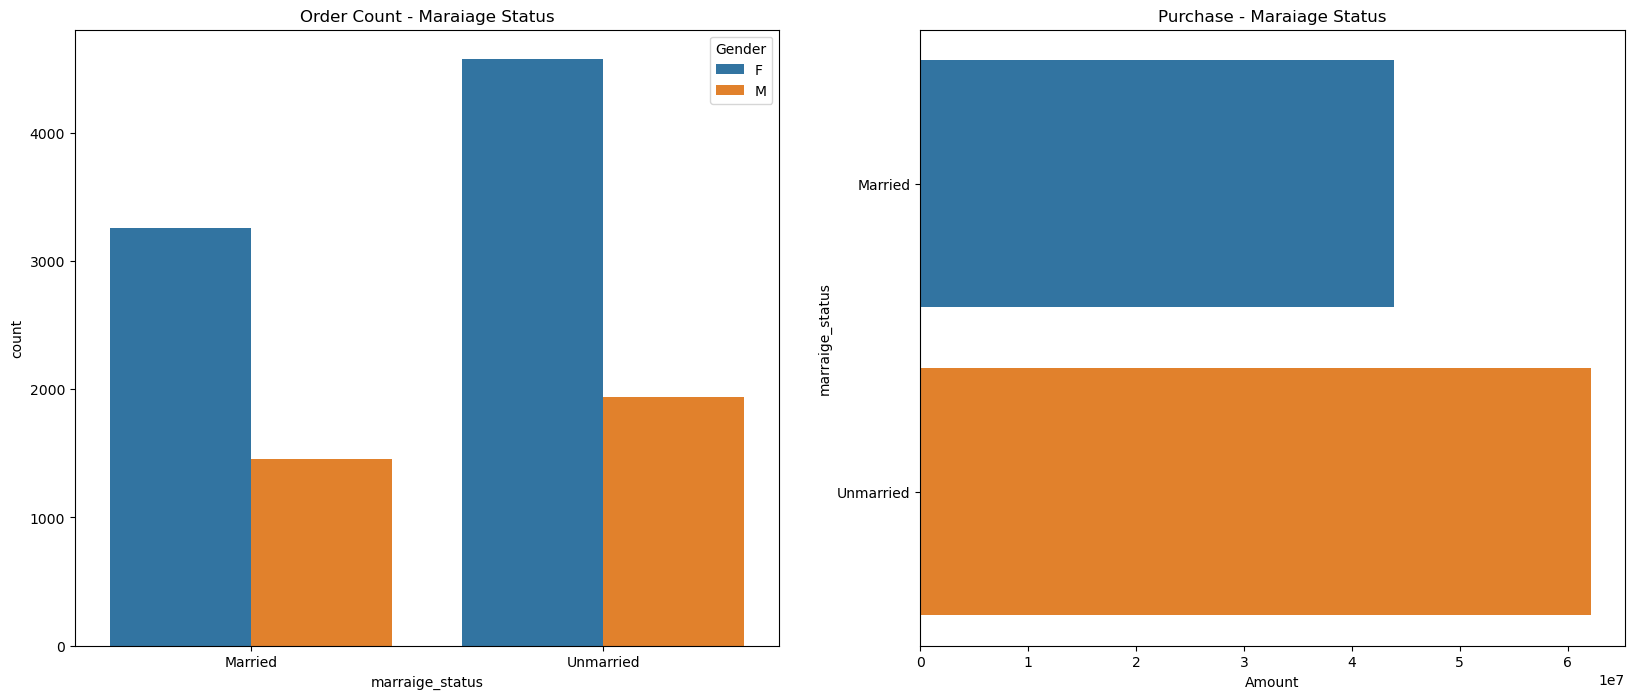

In [53]:
# Plots
fig, ax = plt.subplots(1,2, figsize = (20,8))

# Countplot
sns.countplot( x = 'marraige_status', hue = 'Gender', data = df, ax = ax[0])
ax[0].set_title('Order Count - Maraiage Status')

# Barplot for purchase power
sns.barplot(y = 'marraige_status', x = 'Amount', orient = 'h',
            data = data_marraige_status_amount, ax = ax[1])
ax[1].set_title('Purchase - Maraiage Status')

plt.show()


##### Conclusion: 
Unmarried female places more order, then married female and then unmarried male

In [54]:
df.head(2)

,Unnamed: 0,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,marraige_status
3,21,1000416.0,Hrisheekesh,P00181842,F,26-35,46.0,1.0,Uttar Pradesh,Central,Banking,Auto,2.0,23525.0,Married
4,22,1005256.0,Grant,P00101742,F,26-35,30.0,0.0,Andhra Pradesh,Southern,IT Sector,Auto,1.0,23518.0,Unmarried


Age Group Wise Analysis

In [55]:
# Plot data
data_age_group_amount = df.groupby(['Age Group'], as_index = False)['Amount'].sum()
data_age_group_amount

,Age Group,Amount
0,0-17,2696529.00
1,18-25,17032196.00
2,26-35,42533112.95
3,36-45,22234332.99
4,46-50,9245595.00
5,51-55,8278320.00
6,55+,4101590.00


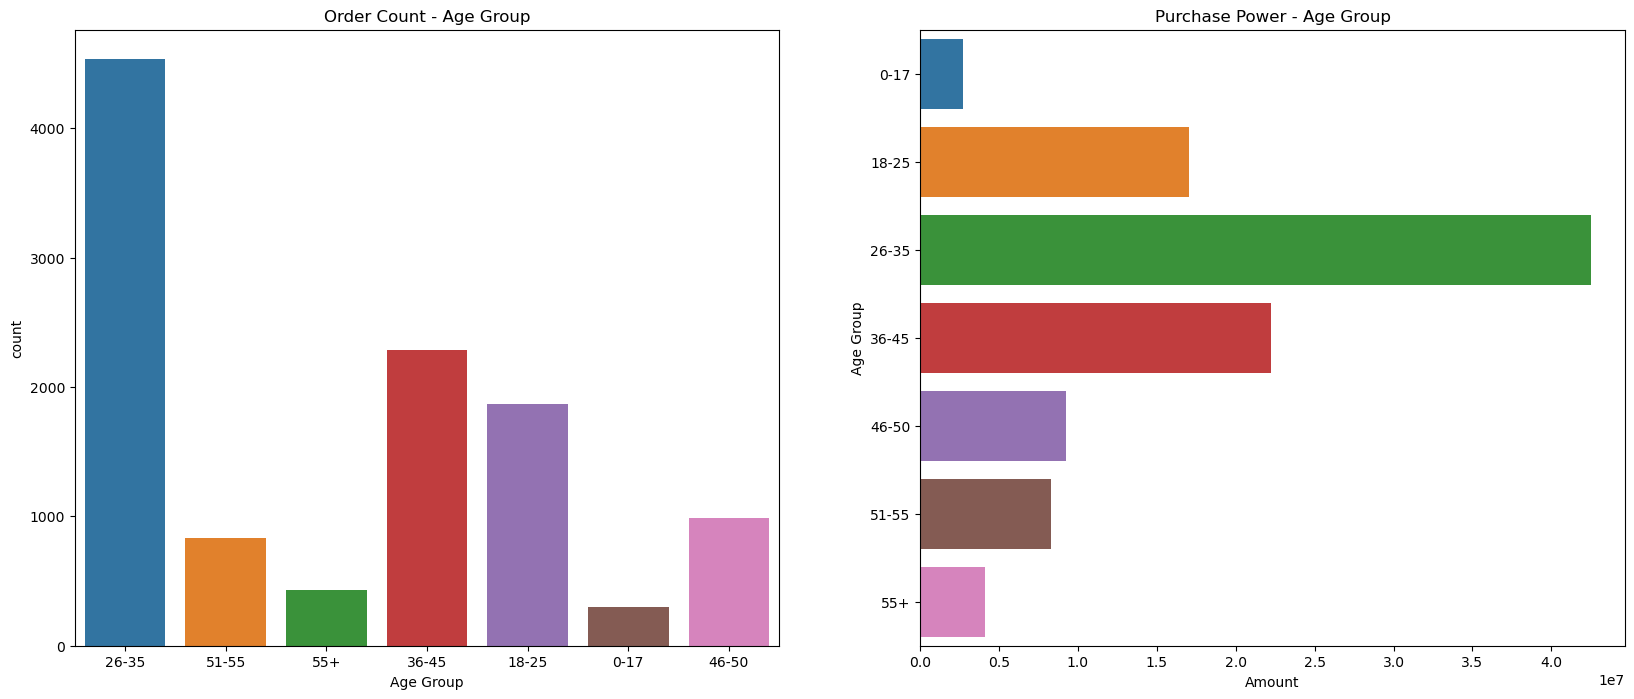

In [56]:
# Plots
fig, ax = plt.subplots(1,2, figsize = (20,8))

# Countplot
sns.countplot( x = 'Age Group', data = df, ax = ax[0])
ax[0].set_title('Order Count - Age Group')

# Barplot for purchase power
sns.barplot(y = 'Age Group', x = 'Amount', orient = 'h',
            data = data_age_group_amount, ax = ax[1])
ax[1].set_title('Purchase Power - Age Group')

plt.show()


##### Conclusion:
26-35 age group people places more order

#### Analysis Parameter
- Gender
- marriage_Status
- Age group
- Product_Category
- State
- Product_ID
- Occupation